In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler#imbalanced learn library

In [92]:
cols=["flength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv(r"C:\Users\VARUN\Downloads\magic04.data",names=cols)
df.head(10)

,flength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


In [93]:
df["class"] = (df["class"]=="g").astype(int)

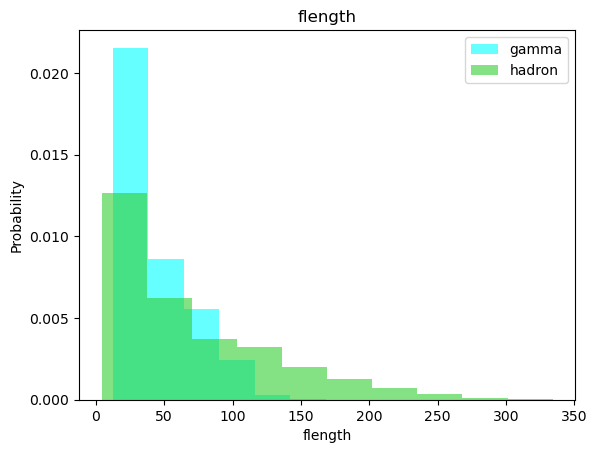

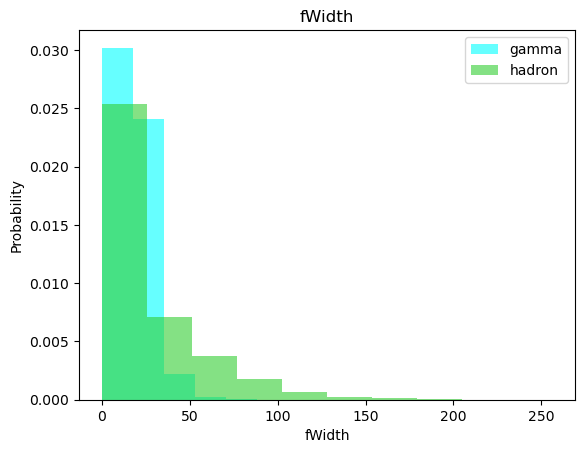

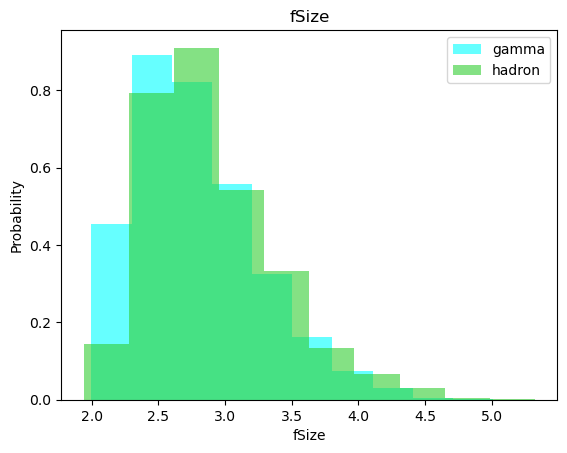

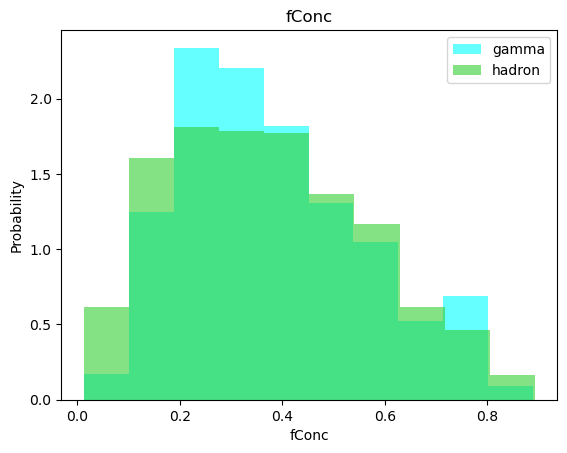

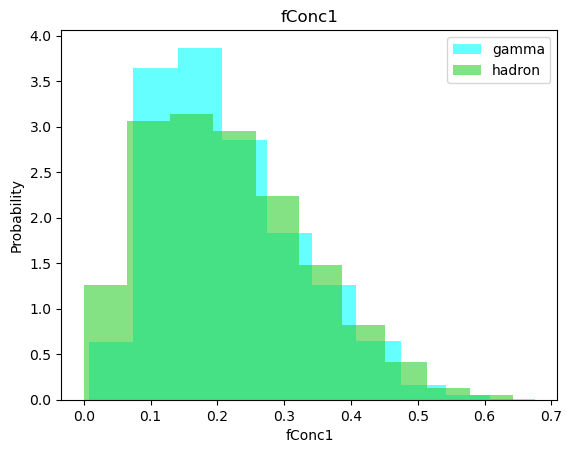

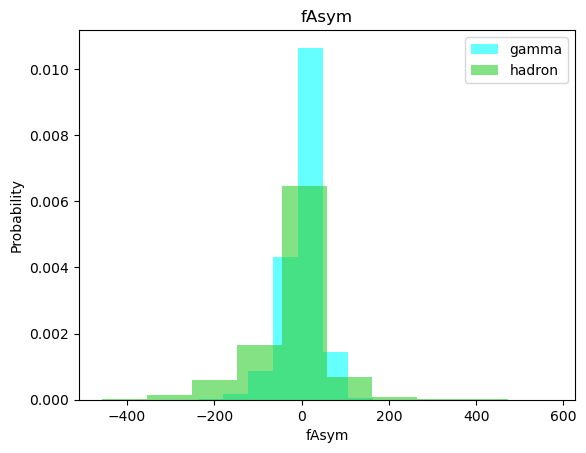

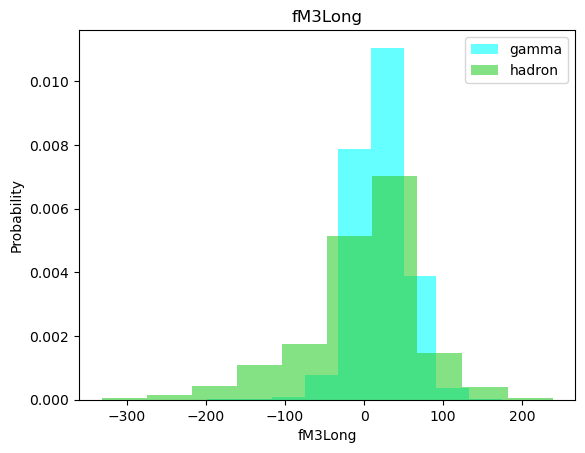

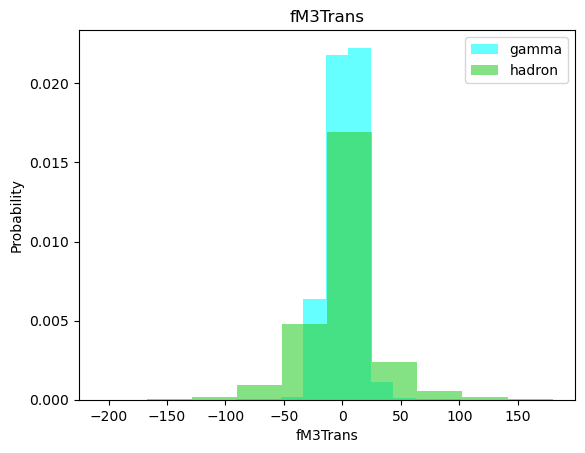

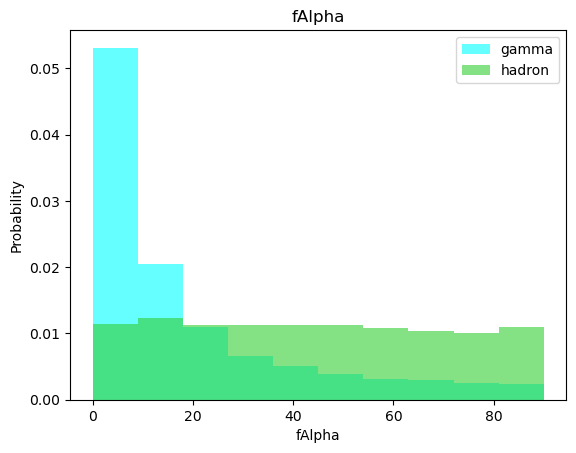

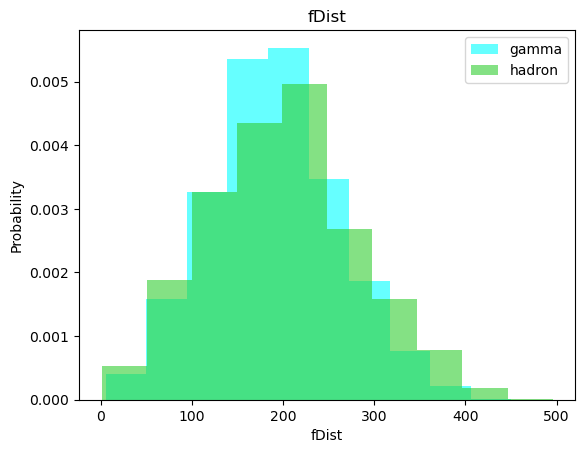

In [94]:

for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color="aqua",density=True,label="gamma",alpha=0.6)
  plt.hist(df[df["class"]==0][label],color="limegreen",density=True,label="hadron",alpha=0.6)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Probability")
  plt.legend()
  plt.show()

In [95]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

"RandomOverSampler" is a technique used in machine learning for dealing with imbalanced datasets, where the distribution of classes is uneven, and one or more classes are underrepresented compared to others. The "RandomOverSampler" is a resampling technique that increases the number of samples in the minority class (i.e., the underrepresented class) by creating synthetic or duplicate samples, randomly sampled from the existing minority class samples.

The "RandomOverSampler" is typically applied to the training set of a machine learning model to balance the class distribution, with the goal of improving the performance of the model, especially for classifiers that are sensitive to imbalanced class distribution, such as logistic regression or decision trees.

The "RandomOverSampler" is implemented as a part of the imbalanced-learn library, which is a popular Python library for handling imbalanced datasets in machine learning. The imbalanced-learn library provides a variety of resampling techniques, including "RandomOverSampler", which can be used in combination with other preprocessing and machine learning techniques to address the challenges associated with imbalanced datasets.

Code snippet->
            if oversample: 
                ros=RandomOverSampler() 
                ros.fit_resample(X,y)
            
ros = RandomOverSampler(): This creates an instance of the "RandomOverSampler" class from the imbalanced-learn library. This object will be used to perform the oversampling.

X, y = ros.fit_resample(X, y): This applies the "RandomOverSampler" to the feature matrix X and target vector y of the dataset. The fit_resample() method is called on the "RandomOverSampler" object (ros) with X and y as arguments.

X: This represents the feature matrix of the dataset, which typically contains the input features used for training a machine learning model.

y: This represents the target vector of the dataset, which typically contains the corresponding labels or classes associated with each sample in X.

The fit_resample() method of the "RandomOverSampler" class fits the sampler to the input data (X and y) and resamples the minority class (i.e., the underrepresented class) to create synthetic or duplicate samples of the minority class. The oversampling is done randomly, creating additional samples from the existing minority class samples to balance the class distribution.

The oversampled feature matrix is returned as X and the corresponding oversampled target vector is returned as y.

After this code snippet is executed, X and y will be updated with the oversampled data, where the minority class is oversampled to balance the class distribution. This oversampled data can be used for training a machine learning model to potentially improve the performance of the model, especially when dealing with imbalanced datasets.

In [96]:
def scale_dataset(dataframe,oversample=False):
  X=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  X=scaler.fit_transform(X)
  
  if oversample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)

  data=np.hstack((X,np.reshape(y,(-1,1))))#-1 is same as len(y)
  
  return data,X,y


In [97]:
train,X_train,y_train=scale_dataset(train,oversample=True)
valid,X_valid,y_valid=scale_dataset(valid,oversample=False)
test,X_test,y_test=scale_dataset(test,oversample=False)

The class likelihood ratio is calculated by taking the ratio of the probability of a sample belonging to a certain class to the probability of it belonging to another class. This ratio is a measure of how much more likely it is that the sample belongs to the first class compared to the second class.

For example, if the class likelihood ratio of a sample for class A versus class B is 2, it means that the sample is twice as likely to belong to class A than to class B. A class likelihood ratio of 1 means that the sample is equally likely to belong to either class, and a ratio less than 1 means that it is more likely to belong to the other class.

For example, let's say we have a test set of 100 email messages, with 20 of them labeled as spam and 80 labeled as ham. 
              precision    recall  f1-score   support

         ham       0.95      0.98      0.96        80
        spam       0.88      0.70      0.78        20

    accuracy                           0.94       100
   macro avg       0.91      0.84      0.87       100
weighted avg       0.94      0.94      0.94       100

class likelihood ratios:
spam vs. ham: 0.29
ham vs. spam: 3.42

Here, we can see that the class likelihood ratio for spam vs. ham is 0.29, which means that a sample is about 3.4 times more likely to be ham than spam. Conversely, the class likelihood ratio for ham vs. spam is 3.42, which means that a sample is about 3.4 times more likely to be ham than spam.

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,class_likelihood_ratios,accuracy_score
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(y_pred)
print(classification_report(y_test,y_pred))
print("class likelihood ratios::",class_likelihood_ratios(y_test,y_pred))
print("Accuracy score::",accuracy_score(y_test,y_pred))

[1 0 0 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1372
           1       0.85      0.88      0.86      2432

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804

class likelihood ratios:: (3.1705231912234413, 0.1715727195632586)
Accuracy score:: 0.8209779179810726


In [99]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,class_likelihood_ratios,accuracy_score
nb_model=GaussianNB()
nb_model=nb_model.fit(X_train,y_train)
y_pred1=nb_model.predict(X_test)
print(classification_report(y_test,y_pred1))
print("class likelihood ratios::",class_likelihood_ratios(y_test,y_pred1))
print("Accuracy Score->",accuracy_score(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.69      0.39      0.50      1372
           1       0.72      0.90      0.80      2432

    accuracy                           0.72      3804
   macro avg       0.71      0.64      0.65      3804
weighted avg       0.71      0.72      0.69      3804

class likelihood ratios:: (1.4734923245614036, 0.252380540166205)
Accuracy Score-> 0.7166140904311251


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,class_likelihood_ratios,accuracy_score
Log_model=LogisticRegression()
Log_model.fit(X_train,y_train)
y_pred2=Log_model.predict(X_test)
print(classification_report(y_test,y_pred2))
print("class likelihood ratios::",class_likelihood_ratios(y_test,y_pred2))
print("Accuracy Score->",accuracy_score(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      1372
           1       0.84      0.83      0.84      2432

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.79      0.79      0.79      3804

class likelihood ratios:: (3.0379344919786098, 0.23628507014028055)
Accuracy Score-> 0.7917981072555205


In [101]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,class_likelihood_ratios,accuracy_score
SVM_Model=SVC()
SVM_Model.fit(X_train,y_train)
y_pred3=SVM_Model.predict(X_test)
print(classification_report(y_test,y_pred3))
print("class likelihood ratios::",class_likelihood_ratios(y_test,y_pred3))
print("Accuracy Score::",accuracy_score(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1372
           1       0.89      0.91      0.90      2432

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.86      0.87      0.86      3804

class likelihood ratios:: (4.35141010305484, 0.11740028593583406)
Accuracy Score:: 0.8654048370136698


SVM is very successful 

NEURAL NET

In [102]:
import tensorflow as tf

In [103]:
nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation="relu",input_shape=(10,)),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.002),loss="binary_crossentropy",metrics=["accuracy"])

In [104]:
history=nn_model.fit(X_train,y_train,epochs=100,batch_size=64,validation_split=0.2,verbose=0)

In [105]:
def plot_loss(history):
    plt.plot(history.history["loss"],label="loss")
    plt.plot(history.history["val_loss"],label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("Binary crossentropy")
    plt.legend()
    plt.grid(True)
    plt.show()
def plot_accuracy(history):
    plt.plot(history.history["accuracy"],label="accuracy")
    plt.plot(history.history["val_accuracy"],label="val_accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

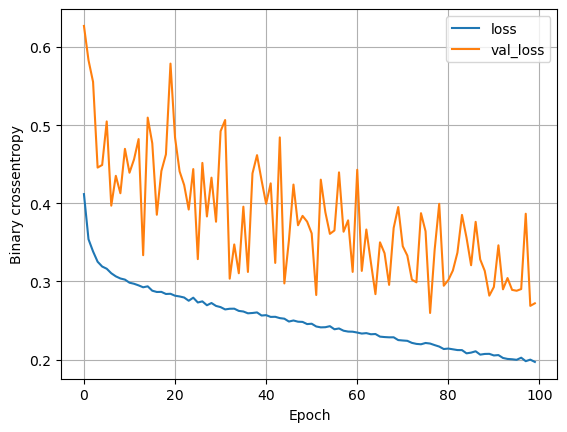

In [106]:
plot_loss(history)


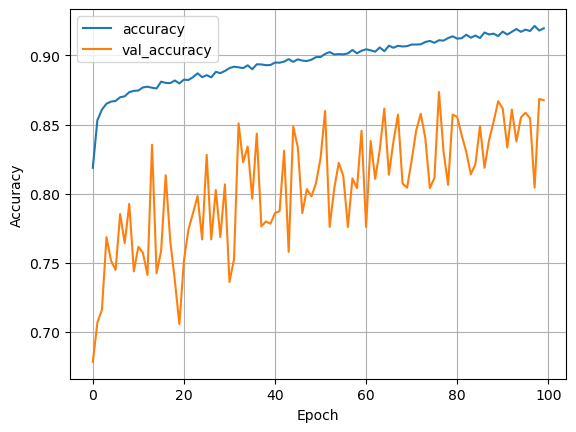

In [107]:
plot_accuracy(history)

In [108]:
from sklearn.metrics import classification_report
y_pred4=nn_model.predict(X_test)
y_pred4=(y_pred4>0.5).astype(int).reshape(-1,)
print(classification_report(y_test,y_pred4))

119/119 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1372
           1       0.88      0.91      0.89      2432

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804

